# House Prices

## Imports

In [38]:
# Necessary imports
import pandas as pd
import seaborn as sns

In [39]:
# Train data
train = pd.read_csv('train.csv')

# Test data
test = pd.read_csv('test.csv')

In [40]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Analisys

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [43]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleanning

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# fill missing values with Unknown
for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna('Unknown', inplace=True)

# fill missing values with 0
for col in train.columns:
    if train[col].dtype != 'object':
        train[col].fillna(0, inplace=True)

# change all string values to numerical ones
for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [46]:
# scale the data
from sklearn.preprocessing import StandardScaler

# scale the train data but not the target SalePrice
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.drop('SalePrice', axis=1))

# create a dataframe of the scaled data
train_scaled_df = pd.DataFrame(data=train_scaled, columns=train.columns[:-1])

train = pd.concat([train_scaled_df, train['SalePrice']], axis=1)

In [47]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,0.138777,0.313867,0.208502,208500
1,-1.728492,-0.872563,-0.045532,0.645747,-0.091886,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,-0.489110,-0.614439,0.313867,0.208502,181500
2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,0.990891,0.138777,0.313867,0.208502,223500
3,-1.723747,0.309859,-0.045532,0.068587,-0.096897,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,140000
4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,2.100892,0.138777,0.313867,0.208502,250000


In [48]:
import matplotlib.pyplot as plt

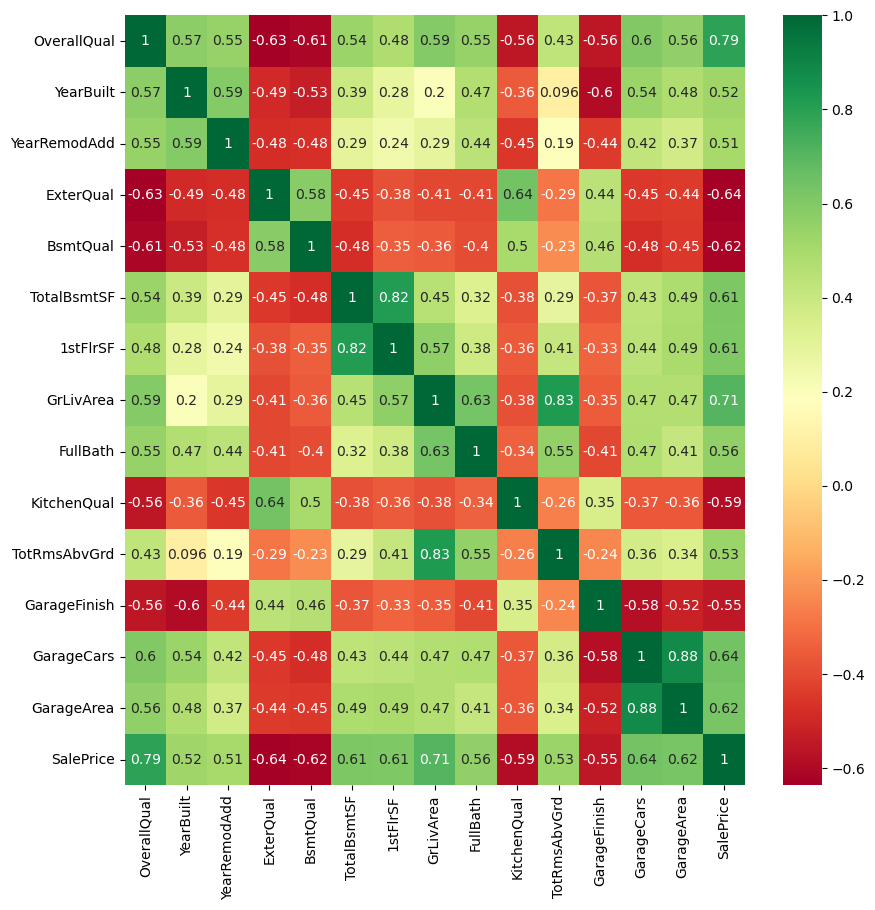

In [49]:
# get the most correlated features with SalePrice
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"]) > 0.5]
plt.figure(figsize=(10, 10))
g = sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

# keep the most correlated features with SalePrice
train = train[top_corr_features]

In [50]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SalePrice
0,0.651479,1.050994,0.878668,-0.777976,-0.339830,-0.459303,-0.793434,0.370333,0.789741,-0.409369,0.912210,-0.318475,0.311725,0.351000,208500
1,-0.071836,0.156734,-0.429577,0.663451,-0.339830,0.466465,0.257140,-0.482512,0.789741,0.795629,-0.318683,-0.318475,0.311725,-0.060731,181500
2,0.651479,0.984752,0.830215,-0.777976,-0.339830,-0.313369,-0.627826,0.515013,0.789741,-0.409369,-0.318683,-0.318475,0.311725,0.631726,223500
3,0.651479,-1.863632,-0.720298,0.663451,0.772619,-0.687324,-0.521734,0.383659,-1.026041,-0.409369,0.296763,0.801942,1.650307,0.790804,140000
4,1.374795,0.951632,0.733308,-0.777976,-0.339830,0.199680,-0.045611,1.299326,0.789741,-0.409369,1.527656,-0.318475,1.650307,1.698485,250000


## Model

As all the data is already cleaned, we will pass into the model trainnig

We choosed to train two main models and, afterwards, choose the best for the answer. As we are making a classifier, we choosed to make a Suport Vector Classifier and a Naive Bayes, as they are one of the basics classifiers

In [51]:
# We are going to use the Gaussian Naive Bayes model, because it is suitable for continuous and discrete variables. We will also use the Support Vector Machine model, because it is suitable for binary classification and for non-linear data.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [52]:
# We are going to use the accuracy score to evaluate the models
from sklearn.metrics import accuracy_score

# We are going to use the train_test_split function to split the train data in train and test data
from sklearn.model_selection import train_test_split

# We are going to evaluate the regression models with the mean squared error
from sklearn.metrics import mean_squared_error

In [53]:
# Dividing the train data in train and test data
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis = 1), train['SalePrice'], test_size = 0.3, random_state = 101)

## Linear Regression

In [54]:
# We are going to use a regression model, because the target variable is continuous.
from sklearn.linear_model import LinearRegression

Accuracy score:  0.7136582020115559
Mean squared error:  1801901035.3530881


<Axes: >

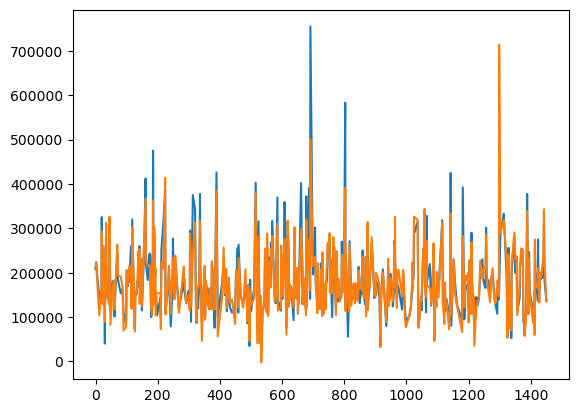

In [55]:
# regression model
LRModel = LinearRegression()

# Fitting the model
LRModel.fit(X_train, y_train)

# Predicting the test data
LRPredictions = LRModel.predict(X_test)

# print the accuracy score
print('Accuracy score: ', LRModel.score(X_test, y_test))

# Evaluating the model for regression
print('Mean squared error: ', mean_squared_error(y_test, LRPredictions))

# plot a line plot with the predicted values and the real values
sns.lineplot(x = y_test.index, y = y_test.values)
sns.lineplot(x = y_test.index, y = LRPredictions)

In [57]:
# using cross validation to evaluate the model
from sklearn.model_selection import cross_val_score

In [59]:
# Cross validation
LRCrossVal = cross_val_score(LRModel, train.drop('SalePrice', axis = 1), train['SalePrice'], cv = 10, scoring = 'r2')

print('Cross validation score: ', LRCrossVal.mean())

Cross validation score:  0.7915706665170306


## Random Forest

In [60]:
# We are going to use the Random Forest Regressor model, because it is suitable for regression problems and for non-linear data.
from sklearn.ensemble import RandomForestRegressor

Accuracy score:  0.8493985467158024
Mean squared error:  947709752.8368076


<Axes: >

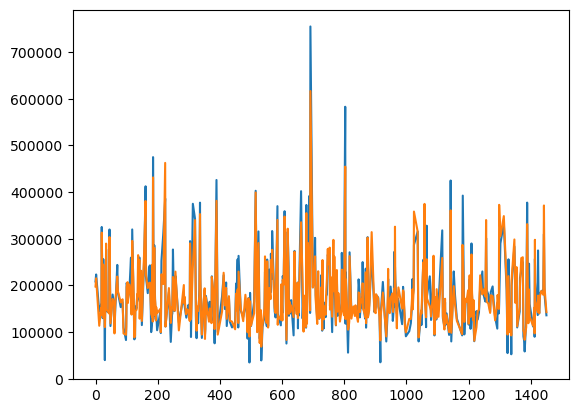

In [61]:
# regression model
RFModel = RandomForestRegressor()

# Fitting the model
RFModel.fit(X_train, y_train)

# Predicting the test data
RFPredictions = RFModel.predict(X_test)

# print the accuracy score
print('Accuracy score: ', RFModel.score(X_test, y_test))

# Evaluating the model for regression
print('Mean squared error: ', mean_squared_error(y_test, RFPredictions))

# plot a line plot with the predicted values and the real values
sns.lineplot(x = y_test.index, y = y_test.values)
sns.lineplot(x = y_test.index, y = RFPredictions)

In [62]:
# Cross validation
RFCrossVal = cross_val_score(RFModel, train.drop('SalePrice', axis = 1), train['SalePrice'], cv = 10, scoring = 'r2')

print('Cross validation score: ', RFCrossVal.mean())

Cross validation score:  0.8406633632187848


## Gradient Boosting Regressor

In [63]:
# We are going to use the Gradient Boosting Regressor model, because it is suitable for regression problems and for non-linear data.
from sklearn.ensemble import GradientBoostingRegressor

Accuracy score:  0.8740100542346709
Mean squared error:  792833653.0449107


<Axes: >

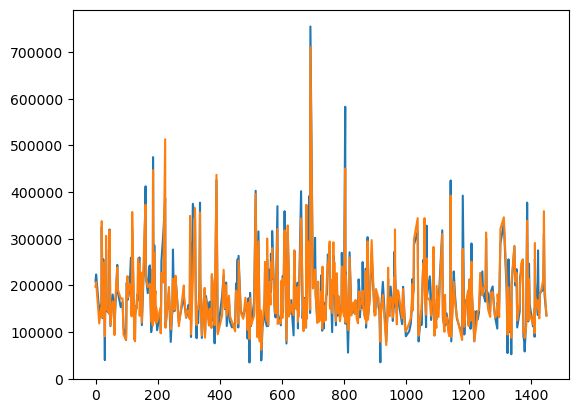

In [64]:
# regression model
GBModel = GradientBoostingRegressor()

# Fitting the model
GBModel.fit(X_train, y_train)

# Predicting the test data
GBPredictions = GBModel.predict(X_test)

# print the accuracy score
print('Accuracy score: ', GBModel.score(X_test, y_test))

# Evaluating the model for regression
print('Mean squared error: ', mean_squared_error(y_test, GBPredictions))

# plot a line plot with the predicted values and the real values

sns.lineplot(x = y_test.index, y = y_test.values)
sns.lineplot(x = y_test.index, y = GBPredictions)

In [65]:
# Cross validation
GBCrossVal = cross_val_score(GBModel, train.drop('SalePrice', axis = 1), train['SalePrice'], cv = 10, scoring = 'r2')

print('Cross validation score: ', GBCrossVal.mean())

Cross validation score:  0.8566483883117775


In [66]:
# we are going to use the Ridge regression model, because it is suitable for regression problems and for non-linear data.
from sklearn.linear_model import Ridge

Accuracy score:  0.713819306294231
Mean squared error:  1800887233.051813


<Axes: >

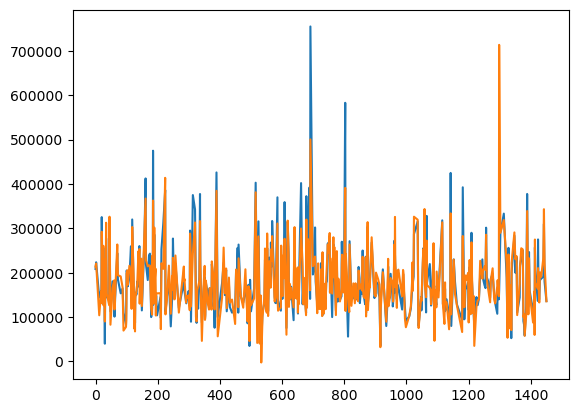

In [67]:
# regression model
RModel = Ridge()

# Fitting the model
RModel.fit(X_train, y_train)

# Predicting the test data
RPredictions = RModel.predict(X_test)

# print the accuracy score
print('Accuracy score: ', RModel.score(X_test, y_test))

# Evaluating the model for regression
print('Mean squared error: ', mean_squared_error(y_test, RPredictions))

# plot a line plot with the predicted values and the real values
sns.lineplot(x = y_test.index, y = y_test.values)
sns.lineplot(x = y_test.index, y = RPredictions)

In [68]:
# Cross validation
RCrossVal = cross_val_score(RModel, train.drop('SalePrice', axis = 1), train['SalePrice'], cv = 10, scoring = 'r2')

print('Cross validation score: ', RCrossVal.mean())

Cross validation score:  0.79162708270523


## Generating The Final Result

In [69]:
# First we need to prepare the test data

# get the Id column
Id = test['Id'].copy()

# fill missing values with Unknown
for col in test.columns:
    if test[col].dtype == 'object':
        test[col].fillna('Unknown', inplace=True)

# fill missing values with 0
for col in test.columns:
    if test[col].dtype != 'object':
        test[col].fillna(0, inplace=True)

# change all string values to numerical ones
for col in test.columns:
    if test[col].dtype == 'object':
        le = LabelEncoder()
        test[col] = le.fit_transform(test[col])

In [70]:
# scale the data
from sklearn.preprocessing import StandardScaler

# scale the test data
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [71]:
# create a dataframe of the scaled data
test = pd.DataFrame(data=test_scaled, columns=test.columns)

# drop the unnecessary columns
test = test[top_corr_features[:-1]]

In [72]:
# Predicting the test data with a voter model with the best models: random forest regressor and gradient boosting regressor
from sklearn.ensemble import VotingRegressor

# regression model
VRModel = VotingRegressor([('RFModel', RFModel), ('GBModel', GBModel)])

# Fitting the model
VRModel.fit(X_train, y_train)

# Predicting the test data
VRPredictions = VRModel.predict(test)

# Create a dataframe with the predictions
predictions = pd.DataFrame(data=VRPredictions, columns=['SalePrice'])

In [73]:
# Join the Id column
predictions = pd.concat([Id, predictions], axis=1)

In [74]:
# submission = predictions with the id as the index
submission = predictions.set_index('Id')

In [75]:
# Saving the submission file
predictions.to_csv('submission.csv', index = False)